# Linear Regression Model with Ridge Regression 
Implement Linear Regression and Ridge Regression model and  Use 10-fold cross validation on 80-20 train-test splits.

### Problem 

The Boston Housing Dataset has been collected by the US Census Service and consists of 14 urban quality-of-life variables, with the last one being the median house price for a given town. Code for loading the dataset is provided at the end of this assignment. Implement a linear regression model with ridge regression that predicts median house prices from the other variables. Use 10-fold cross validation on 80-20 train-test splits and report the final R2 values that you discovered. (You may want to preprocess your data to the range [0; 1] in order to get meaningful results.)
<br>


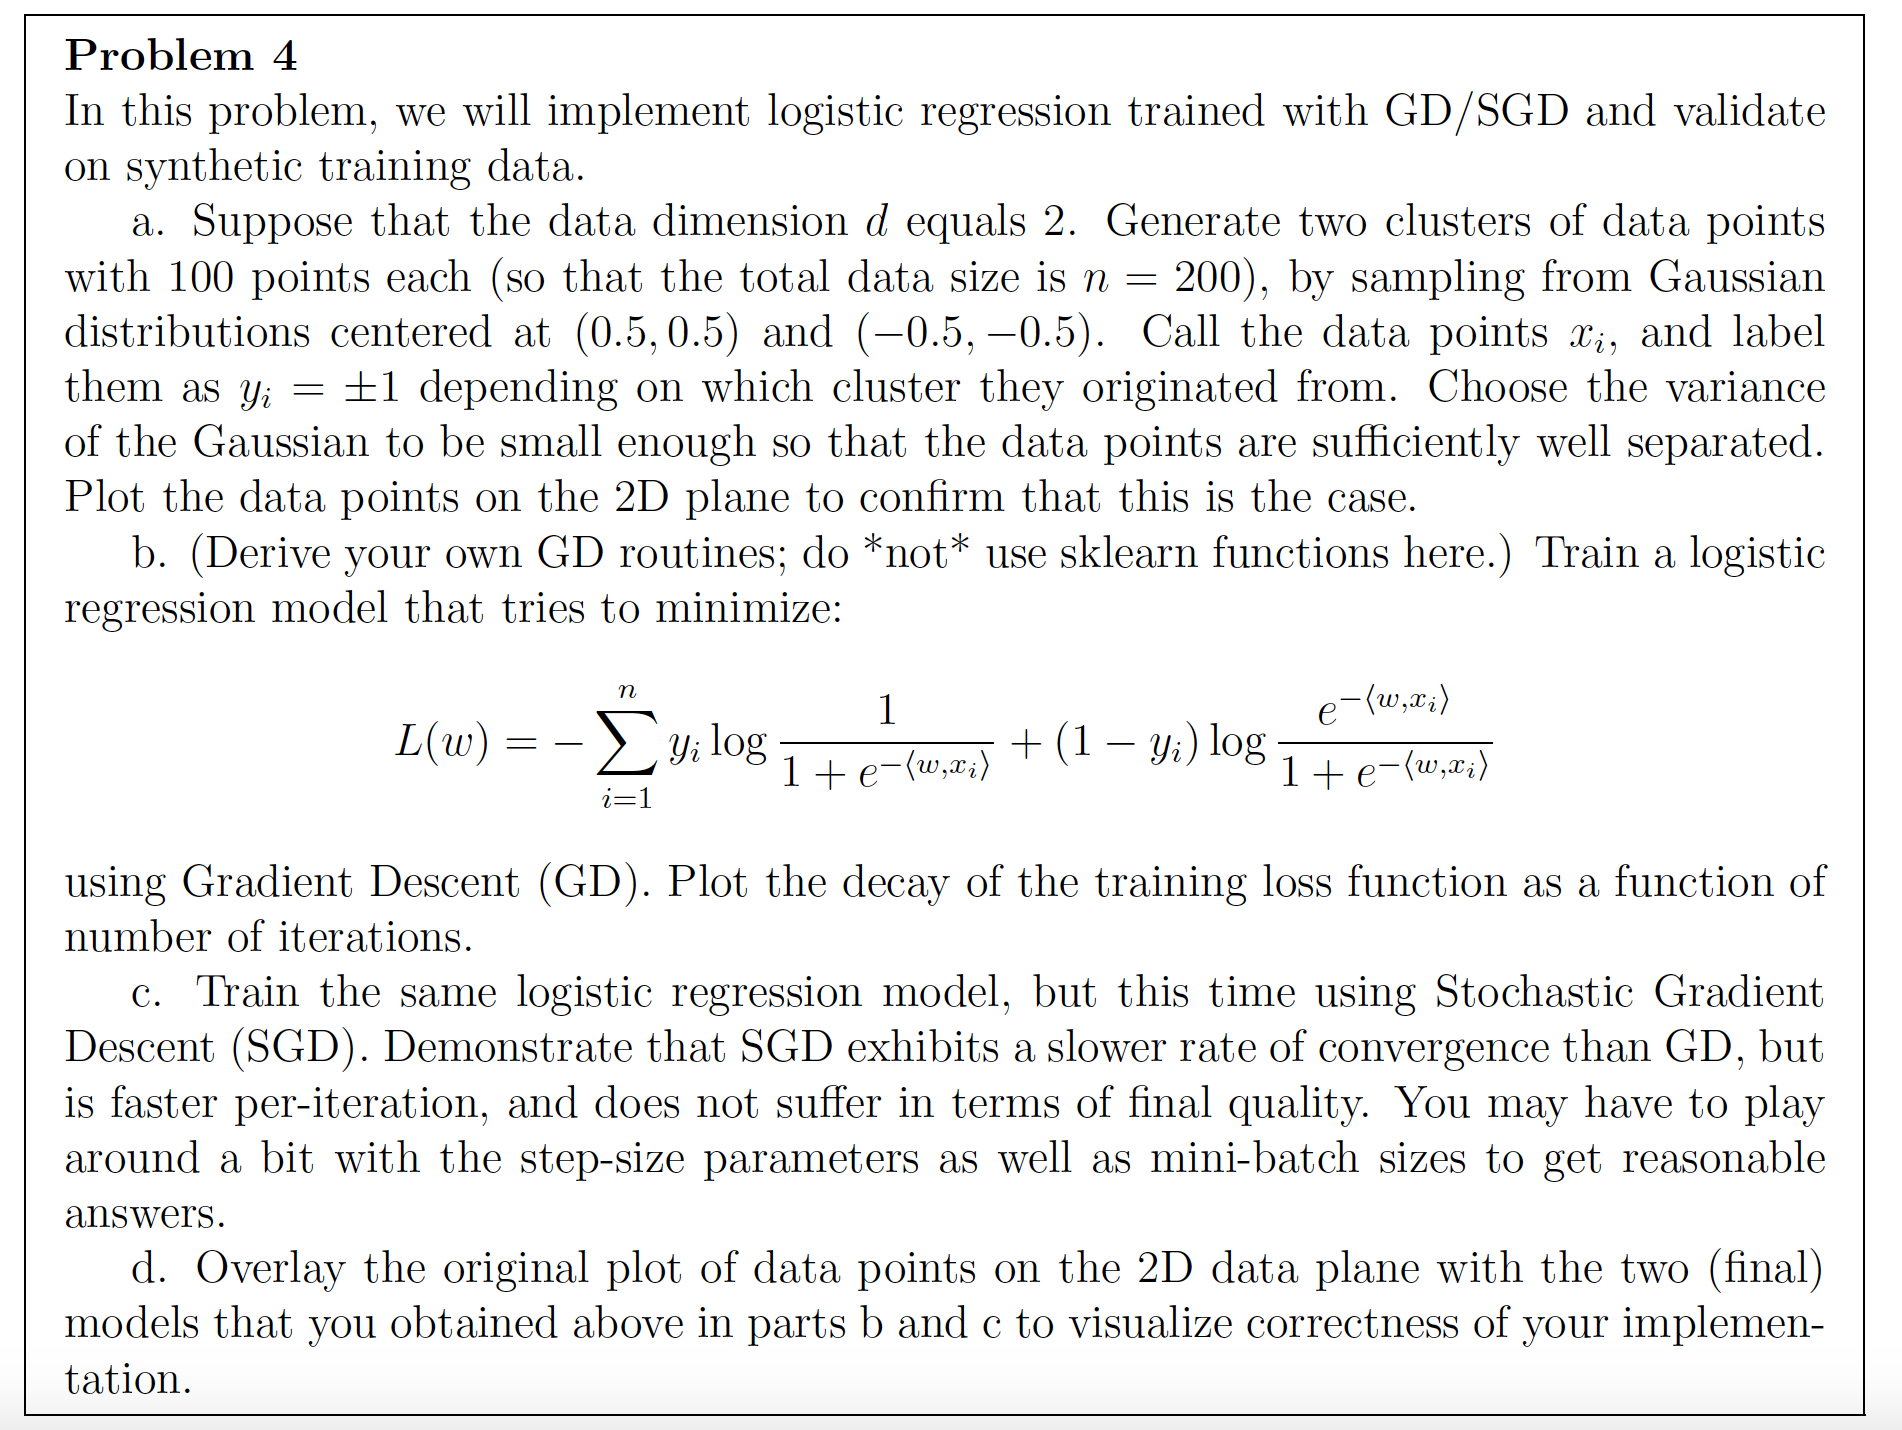

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split , KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Modifying and normalizing the data 

In [2]:
X = boston.drop('MEDV',axis=1)
Y = boston['MEDV']

In [3]:
# Normalize dataset
X = (X - np.min(X,axis=0))/(np.max(X,axis=0) - np.min(X,axis=0))

# # Alternate way to normalize the data 
# scaler = MinMaxScaler(feature_range=(0, 1))
# rescaledX = scaler.fit_transform(X)

# # add a column on 1's
X = np.concatenate([np.ones((X.shape[0],1)), X],axis=1)

#### Function to Calculate the R2 score 


In [10]:
def calculate_r2(y_test,y_pred):
    # ssr = np.sum((y_p-y)**2)
    # sst = np.sum((y-y.mean())**2)
    # r2 = 1-(ssr/sst)
    RSS = np.mean((y_pred-y_test)**2)/(np.std(y_test)**2)
    RSQ = 1 - RSS
    return RSQ  


#### Executing 10-Fold Cross Validation using Ridge Regression 

In [9]:
rr = Ridge(alpha=0.01)

cost = []

for i in range(10):
    # 10-fold cross-validation
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    model = rr.fit(X_train,Y_train)
    predictions = rr.predict(X_test)
    cost.append(calculate_r2(Y_test,predictions))

print('Final 10-Fold Score on the 80% data :' , np.mean(cost))


Final 10-Fold Score on the 80% data : 0.7150038740970276
